<h2>Analisi comparativa dei metodi di dosaggio degli anticorpi anti recettore del TSH</h2>
<h3>Metodo Routine:<h3>
<ul>
<li><small>Brahms Trak Human con metodica LIA</small> </li>
<li>Metodo Siemens XPi TSI Assay chemiluminescenza Immulite 2000</li>
</ul>
<h3>Metodo di comparazione Thermophisher: anti TSH-R Elia su Immunocap 250</h3>

Analisi dei dati effettuata con la suite CONTINUUM ANALITICS https://www.continuum.io/

basata sui seguenti moduli python:
<ul>
<li>Pandas: per la gestione dei dati e le analisi di base </li>
<li> Matplotlib: per i grafici di base</li>
<li>Seaborn per grafici avanzati</li>
<li>Statmodels e scipy per le analisi avanzate</li>
</ul>

** tutti i software utilizzati sono open source**

In [6]:
%matplotlib inline
#importo le librerie
import pandas as pd
import os
from __future__ import print_function,division
import numpy as np
import seaborn as sns
os.environ["NLS_LANG"] = "ITALIAN_ITALY.UTF8"

<h4>Importazione del file con i dati </h4>

In [7]:
#importo il file con i dati
path=r"D:\d\05 Lavscien\autoimmunita\corr_thibya\compar_thibya_immulite.csv"
database=pd.read_csv(path,sep=';',usecols=[1, 2, 3,4,5])#colonne da utilizzare
database['valore_cap']=database['valore_cap'].apply(lambda x: round(x,2))
database.drop(['codificato','accettazione'],axis=1,inplace=True)
database.tail(6)


,campione,valore_cap,valore_rut
65,9430603566,3.96,0.36
66,9430092145,2.82,0.10
67,9430092403,2.58,0.10
68,9430603993,2.53,0.10
69,9430604501,2.99,0.32
70,9430092760,3.00,0.10


In [8]:
database.describe()

,campione,valore_cap,valore_rut
count,7.100000e+01,71.000000,71.000000
mean,9.430525e+09,5.778873,4.835915
std,1.863832e+05,12.625289,25.163154
min,9.430092e+09,1.920000,0.100000
25%,9.430603e+09,2.400000,0.100000
50%,9.430604e+09,2.710000,0.100000
75%,9.430605e+09,3.635000,0.925000
max,9.430606e+09,96.440000,206.000000


Varibili d'ambiete in comune

In [9]:
#variabili d'ambiente comuni
cutoff_cap=2.9 #tre 2.9 r 3.3 dubbi
#cutoff_cap=3.3
#cutoff_rout=1 #brahms 1-1.5 dubbi
cutoff_rout=1.5 #Siemens
METODO_ROUTINE="Siemens Immulite 2000 Chemil."
CAP="Thermo Fisher ELIA anti-TSH-R Cap250 "

<h3>Aggiungo due colonne con pos neg in base al cut-off</h3>

In [10]:


database['cap_PN']=(database['valore_cap']>=cutoff_cap)
database['rut_PN']=(database['valore_rut']>=cutoff_rout)
database.head(5)

,campione,valore_cap,valore_rut,cap_PN,rut_PN
0,9430605329,2.28,0.10,False,False
1,9430604072,2.47,0.10,False,False
2,9430092879,3.95,0.41,True,False
3,9430605389,2.40,0.10,False,False
4,9430605280,3.65,2.96,True,True


In [11]:
database['cap_PN'].replace([True,False],['Pos','Neg'],inplace=True)
database['rut_PN'].replace([True,False],['Pos','Neg'],inplace=True)
database.describe()

,campione,valore_cap,valore_rut
count,7.100000e+01,71.000000,71.000000
mean,9.430525e+09,5.778873,4.835915
std,1.863832e+05,12.625289,25.163154
min,9.430092e+09,1.920000,0.100000
25%,9.430603e+09,2.400000,0.100000
50%,9.430604e+09,2.710000,0.100000
75%,9.430605e+09,3.635000,0.925000
max,9.430606e+09,96.440000,206.000000


<h4>Calcolo la tabella delle frequenze</h4>
<font color='red'> **modulo utilizzato scipy.stat** </font>  http://docs.scipy.org/doc/scipy/reference/stats.html

In [12]:
#sci.py moduli
from scipy.stats import chi2_contingency, fisher_exact
pd.crosstab(database.cap_PN,database.rut_PN)

rut_PN,Neg,Pos
cap_PN,,
Neg,40,0
Pos,19,12


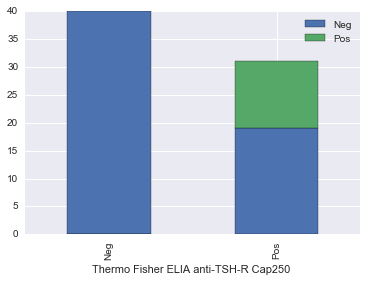

In [13]:
ax=pd.crosstab(database.cap_PN,database.rut_PN).plot(kind='bar',stacked=True, )
ax.legend(['Neg','Pos'])
ax.set_xlabel(CAP)

<h4> Test chi quadrato</h4>

In [14]:
# test chi square
chi2, pvalue, dof, ex = chi2_contingency(pd.crosstab(database.cap_PN,database.rut_PN))
print ('valore di p:{}'.format(pvalue))

valore di p:6.40523379291e-05


<h4> Test esatto di Fisher</h4>

In [15]:
# test esatto di Fisher
oddsratio, pvalue =fisher_exact(pd.crosstab(database.cap_PN,database.rut_PN))
print ('valore di p:{}'.format(pvalue))

valore di p:1.10226841265e-05


<h3>test corretto per questo caso è il test di McNemar:</h3>
**test non parametrico dati appaiati risposte nominali binarie**
<h4> Test esatto McNemar (per la dipendenza delle variabili)</h4>
<font color='red'> **modulo utilizzato statsmodels** </font>  http://statsmodels.sourceforge.net/stable/index.html

In [16]:
from statsmodels.sandbox.stats.runs import mcnemar
stat,p=mcnemar(pd.crosstab(database.cap_PN,database.rut_PN))
print("valore di p:{}".format(p))


valore di p:3.81469726562e-06


-

<h2> Analisi della regressione</h2>

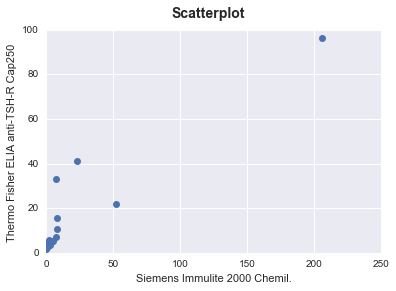

In [17]:
# grafico di dispersione 
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Scatterplot', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel(METODO_ROUTINE)
ax.set_ylabel(CAP)
ax.plot(database.valore_rut,database.valore_cap,'o')
plt.show()

** eseguiamo ora lo studio di regressione con tre modelli diversi**

<font color='red'>Moduli statmodels e scipy </font>

In [18]:
# con statmodel : regressione minimi quadrati
##res_ols = sm.OLS(y, statsmodels.tools.add_constant(X)).fit() per vecchia versione
import statsmodels.api as sm
#sm.OLS(Y,X)
X = sm.add_constant(database.valore_rut )
modello_minquad=sm.OLS(database.valore_cap,X)
regressione_minquad=modello_minquad.fit()
regressione_minquad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             valore_cap   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     419.7
Date:                Fri, 30 Sep 2016   Prob (F-statistic):           4.81e-31
Time:                        12:07:33   Log-Likelihood:                -210.78
No. Observations:                  71   AIC:                             425.6
Df Residuals:                      69   BIC:                             430.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5303      0.578      6.112      0.000       2.378       4.683
valore_rut     0.4650      0.023     20.486      0.000       0.420       0.510
==============================================================================
Omnibus:                      108.177   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2104.747
Skew:                           4.972   Prob(JB):                         0.00
Kurtosis:                      27.751   Cond. No.                         25.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# con statmodel : regressione robusta (Robust Linear Model)
X = sm.add_constant(database.valore_rut)
modello=sm.RLM(database.valore_cap,X)
regressione_robusta=modello.fit()
regressione_robusta.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:             valore_cap   No. Observations:                   71
Model:                            RLM   Df Residuals:                       69
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 30 Sep 2016                                         
Time:                        12:07:33                                         
No. Iterations:                    24                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6624      0.071     37.645      0.000       2.524       2.801
valore_rut     0.4555      0.003    163.889      0.000       0.450       0.461
==============================================================================

If the model instance has been used for another fit with different fit
parameters, then the fit options might not be the correct ones anymore .
"""

[(0, 250.0)]

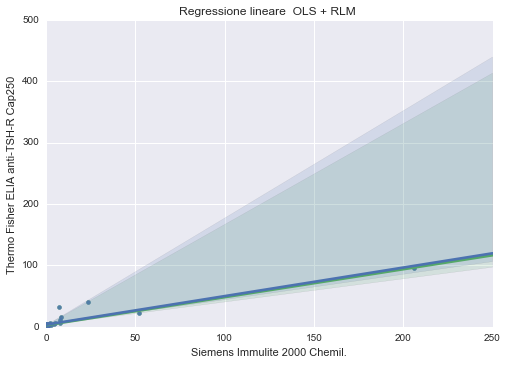

In [20]:
#importo la librearia seborn per una migliore visualizzazione grafica

sns.set(color_codes=True)

ax = sns.regplot(x=database.valore_rut,y=database.valore_cap,  color="g",robust=True)
ax = sns.regplot(x=database.valore_rut,y=database.valore_cap,  color="b")
ax.set_title('Regressione lineare  OLS + RLM ')
ax.set_xlabel(METODO_ROUTINE)
ax.set_ylabel(CAP)
ax.set(ylim=(0, None))
ax.set(xlim=(0, None))

[(0, 8)]

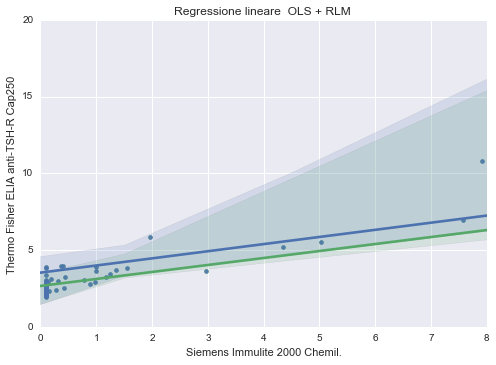

In [21]:
sns.set(color_codes=True)
ax2 = sns.regplot(x=database.valore_rut,y=database.valore_cap,  color="g",robust=True)
ax2 = sns.regplot(x=database.valore_rut,y=database.valore_cap,  color="b")
ax2.set_title('Regressione lineare  OLS + RLM ')
ax2.set_xlabel(METODO_ROUTINE)
ax2.set_ylabel(CAP)
ax2.set(ylim=(0, 20))
ax2.set(xlim=(0, 8))

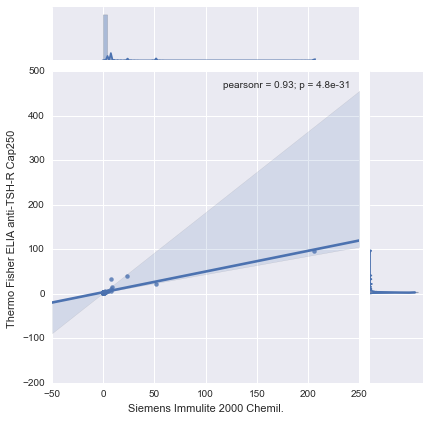

In [22]:
ax=sns.jointplot(x=database.valore_rut,y=database.valore_cap, kind="reg");
ax.set_axis_labels(METODO_ROUTINE,CAP)

** Ortogonal Distance Regression (Deming Regression)**

In [23]:
# regressione ODR  (ortogonal distance regression Deming)
import scipy.odr as odr
#modello di fitting
def funzione(B,x):
    return B[0]*x+B[1]
linear= odr.Model(funzione)
variabili=odr.Data(database.valore_rut,database.valore_cap)
regressione_ortogonale=odr.ODR(variabili,linear,beta0=[1., 2.])
output=regressione_ortogonale.run()
output.pprint()
output

Beta: [ 0.47889129  3.46299595]
Beta Std Error: [ 0.022821    0.57925143]
Beta Covariance: [[  2.78872179e-05  -1.34860019e-04]
 [ -1.34860019e-04   1.79667789e-02]]
Residual Variance: 18.6751458743
Inverse Condition #: 0.0398025613057
Reason(s) for Halting:
  Sum of squares convergence


<h4>Bias</h4>

In [24]:
database_b=database
database_b['bias']=database['valore_rut']-database['valore_cap']
database_b.head()

,campione,valore_cap,valore_rut,cap_PN,rut_PN,bias
0,9430605329,2.28,0.10,Neg,Neg,-2.18
1,9430604072,2.47,0.10,Neg,Neg,-2.37
2,9430092879,3.95,0.41,Pos,Neg,-3.54
3,9430605389,2.40,0.10,Neg,Neg,-2.30
4,9430605280,3.65,2.96,Pos,Pos,-0.69


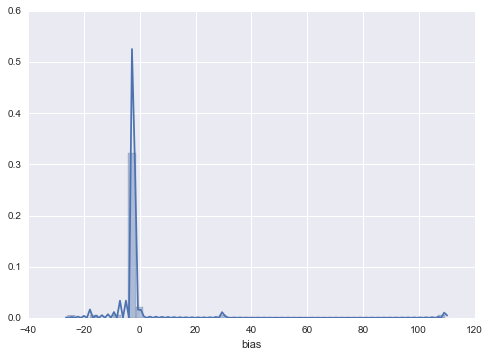

In [25]:
sns.distplot(database_b.bias)

In [26]:
database.describe()

,campione,valore_cap,valore_rut,bias
count,7.100000e+01,71.000000,71.000000,71.000000
mean,9.430525e+09,5.778873,4.835915,-0.942958
std,1.863832e+05,12.625289,25.163154,14.274561
min,9.430092e+09,1.920000,0.100000,-25.870000
25%,9.430603e+09,2.400000,0.100000,-2.700000
50%,9.430604e+09,2.710000,0.100000,-2.370000
75%,9.430605e+09,3.635000,0.925000,-2.095000
max,9.430606e+09,96.440000,206.000000,109.560000


Normalize data

In [27]:
'''from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

normalized = pd.DataFrame(database.valore_cap)
normalized'''

'from sklearn import preprocessing\n\nmin_max_scaler = preprocessing.MinMaxScaler()\nx_scaled = min_max_scaler.fit_transform(x)\n\nnormalized = pd.DataFrame(database.valore_cap)\nnormalized'